In [1]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

snv_data = read.table(file = '../../data/snv-data/for_use/moderate_frequency.tsv.gz', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(snv_data))) {
    snv_data[,i] <- as.logical(snv_data[,i])
}

head(snv_data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Attaching package: ‘igraph’


The following object is masked from ‘package:arules’:

    union


The following object is masked fro

,SRR10903401,SRR10903402,SRR10971381,SRR11059940,SRR11059942,SRR11059943,SRR11059944,SRR11059945,SRR11059946,SRR11059947,⋯,SRR11409417,SRR11410528,SRR11410529,SRR11410532,SRR11410533,SRR11410536,SRR11410538,SRR11410540,SRR11410541,SRR11410542
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NC_045512:A:10024:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10435:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10773:C,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:10987:T,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:11367:T,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NC_045512:A:11849:G,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [2]:
snv_data_transactions <- as(snv_data, "transactions")
summary(snv_data_transactions)

transactions as itemMatrix in sparse format with
 437 rows (elements/itemsets/transactions) and
 41 columns (items) and a density of 0.0302506 

most frequent items:
SRR11059942 SRR11397719 SRR11059946 SRR11059943 SRR11059945     (Other) 
        103          70          40          34          30         265 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   6   8   9  10 
398  19   5   5   6   2   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.24    1.00   10.00 

includes extended item information - examples:
       labels   variables levels
1 SRR10903401 SRR10903401   TRUE
2 SRR10903402 SRR10903402   TRUE
3 SRR10971381 SRR10971381   TRUE

includes extended transaction information - examples:
        transactionID
1 NC_045512:A:10024:T
2 NC_045512:A:10435:T
3 NC_045512:A:10773:C

# Mine rules/itemsets

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[41 item(s), 437 transaction(s)] done [0.00s].
sorting and recoding items ... [28 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [23 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 23 rules 

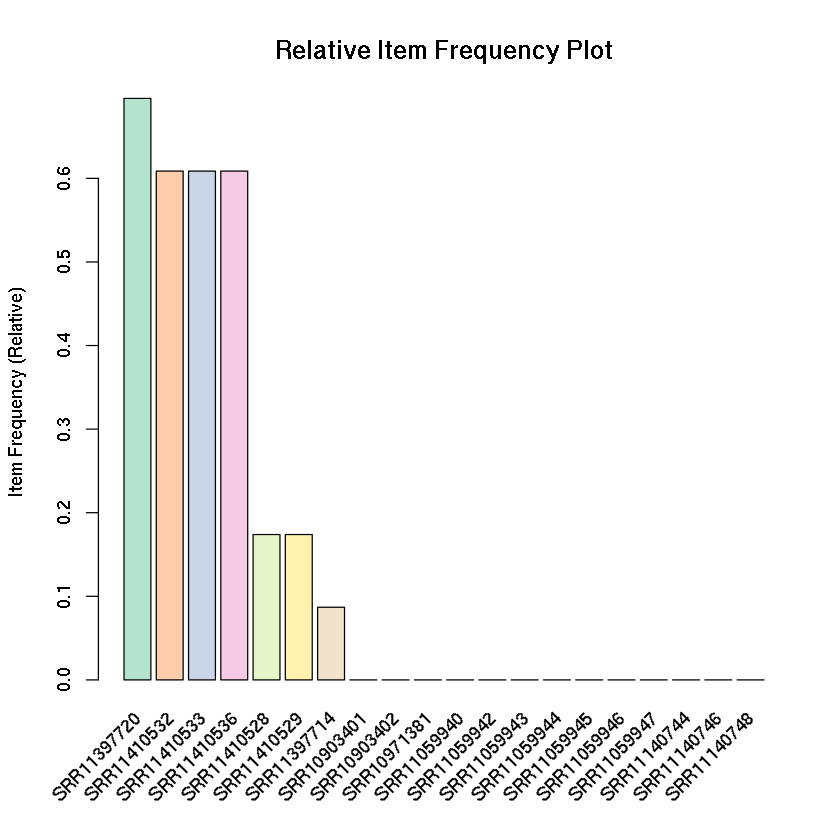

In [3]:
snv_rules <- apriori(snv_data_transactions, parameter=list(support=0.01, confidence=0.7, target="rules"))
snv_rules

arules::itemFrequencyPlot(items(snv_rules),
    topN=20,
    col=brewer.pal(8,'Pastel2'),
    main='Relative Item Frequency Plot',
    type="relative",
    ylab="Item Frequency (Relative)")

In [4]:
inspect(snv_rules)

     lhs                                      rhs           support   
[1]  {SRR11410528}                         => {SRR11410529} 0.01830664
[2]  {SRR11410529}                         => {SRR11410528} 0.01830664
[3]  {SRR11397720}                         => {SRR11410533} 0.01144165
[4]  {SRR11397720}                         => {SRR11410536} 0.01144165
[5]  {SRR11397720}                         => {SRR11410532} 0.01144165
[6]  {SRR11397714,SRR11410528}             => {SRR11410529} 0.01144165
[7]  {SRR11397714,SRR11410529}             => {SRR11410528} 0.01144165
[8]  {SRR11397720,SRR11410533}             => {SRR11410536} 0.01144165
[9]  {SRR11397720,SRR11410536}             => {SRR11410533} 0.01144165
[10] {SRR11410533,SRR11410536}             => {SRR11397720} 0.01144165
[11] {SRR11397720,SRR11410533}             => {SRR11410532} 0.01144165
[12] {SRR11397720,SRR11410532}             => {SRR11410533} 0.01144165
[13] {SRR11410532,SRR11410533}             => {SRR11397720} 0.01144165
[14] {

# Graph rules

pdf 
  3

png 
  2

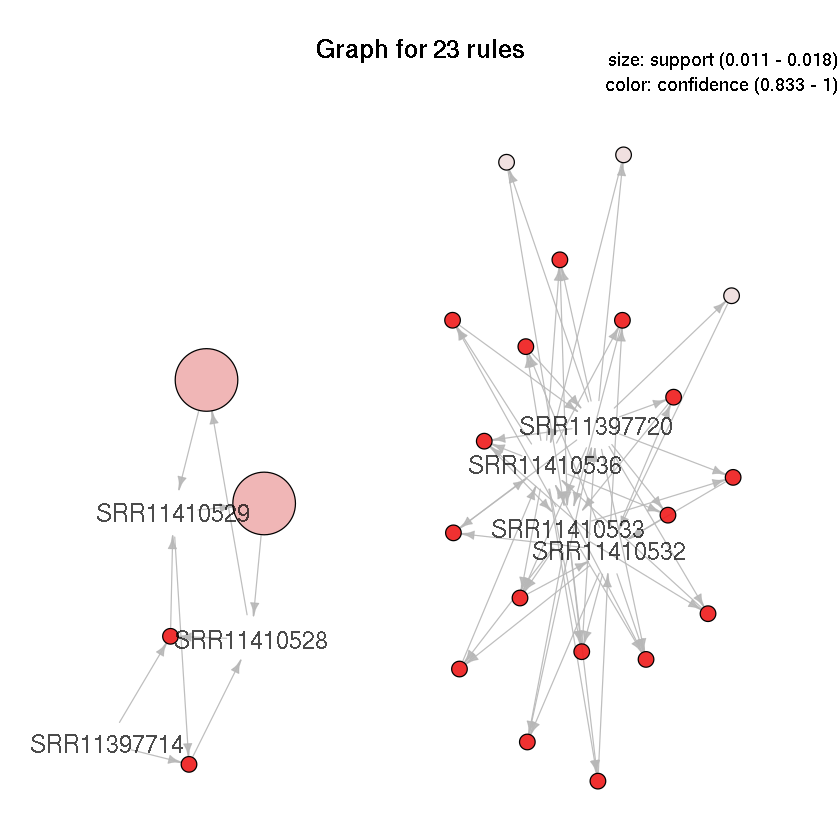

In [13]:
#plot(symptom_rules, method="graph", control=list(layout=igraph::in_circle()))
#plot(symptom_rules, method="graph", control=list(layout=igraph::with_graphopt(spring.const=1, mass=100)))

set.seed(19)
plot(snv_rules, method="graph", cex=1.3, measure="support", shading="confidence", alpha=0.9,
    control=list(layout=igraph::with_graphopt(spring.const=0.3, mass=50)))
dev.copy(pdf, "snv-moderate-rules.pdf")
dev.off()